In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def plot_res(X, y, losses, y_preds):
    plt.figure(figsize=(15,5))


    plt.subplot(1,3,1)
    plt.scatter(X, y, label="Data", color="blue")
    plt.plot(X, y_preds, color="red", label="Fitted line", linewidth=2)
    plt.title("Data and Learned Regression Line")
    plt.legend()


    plt.subplot(1,3,2)
    plt.plot(losses, color="green")
    plt.title("Loss over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")


    residuals = y - y_preds
    plt.subplot(1,3,3)
    plt.scatter(X, residuals, color="purple")
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Residuals Plot")
    plt.xlabel("X")
    plt.ylabel("Error (y - y_pred)")

    plt.tight_layout()
    plt.show()

# basic Linear reggression

##  1. Hypothesis (Model)

For **one feature (simple linear regression):**

$$
\hat{y}_i = w x_i + b
$$

* $X \in \mathbb{R}^{n \times d}$ → dataset with $n$ samples and $d$ features
* $w \in \mathbb{R}^{d}$ → weight vector
* $b \in \mathbb{R}$ → bias (intercept)
* $\hat{y} \in \mathbb{R}^{n}$ → predicted values

---

##  2. Loss Function (Mean Squared Error)

We want to minimize the difference between predictions and actual values:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### 3.1 Gradient w\.r.t $w$

Take derivative of $J$ with respect to $w$:

$$
\frac{\partial J}{\partial w}
= -\frac{2}{n} \sum_{i=1}^n x_i \, (y_i - (w x_i + b))
$$

---

### 3.2 Gradient w\.r.t $b$

Take derivative of $J$ with respect to $b$:

$$
\frac{\partial J}{\partial b}
= -\frac{2}{n} \sum_{i=1}^n (y_i - (w x_i + b))
$$

---

##  4. Gradient Descent Update Rules

At each iteration $t$:

$$
w^{(t+1)} = w^{(t)} - \alpha \cdot \frac{\partial J}{\partial w}
$$

$$
b^{(t+1)} = b^{(t)} - \alpha \cdot \frac{\partial J}{\partial b}
$$

where $\alpha$ is the **learning rate**.


In [115]:
class LinRegBasic:
    def __init__(self, alpha=0.01, limit=1000, epsilon=1e-6):
        self.alpha = alpha
        self.limit = limit
        self.epsilon = epsilon
        self.w = np.random.rand()
        self.b = np.random.rand()

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        losses = []

        for iteration in range(self.limit):
            y_hats = self.w * X_train + self.b
            loss = np.mean((y_hats - y_train) ** 2)
            losses.append(loss)

            gradient_w = 2/len(X_train) * np.sum(X_train * (y_hats - y_train))
            gradient_b = 2/len(X_train) * np.sum(y_hats - y_train)


            self.w -= self.alpha * gradient_w
            self.b -= self.alpha * 2 * gradient_b
            if abs(self.alpha * gradient_w) < self.epsilon and abs(self.alpha * gradient_b*10) < self.epsilon:
                break

        return losses

    def predict(self, X):
        X = np.array(X)
        return self.w * X + self.b


## data generation

In [116]:
np.random.seed(42)
X = np.linspace(-10, 10, 100)
true_w, true_b = -3, 10
noise = np.random.rand(100) * 3
y = true_w * X + true_b + noise

In [117]:
model = LinRegBasic(alpha=0.01,limit=1000, epsilon=1e-6)
losses = model.fit(X, y)

print(f"Learned w = {model.w:.3f}, b = {model.b:.3f}")
print(f"True w = {true_w}, b = {true_b}")

y_pred = model.predict(X)

Learned w = -2.997, b = 11.411
True w = -3, b = 10


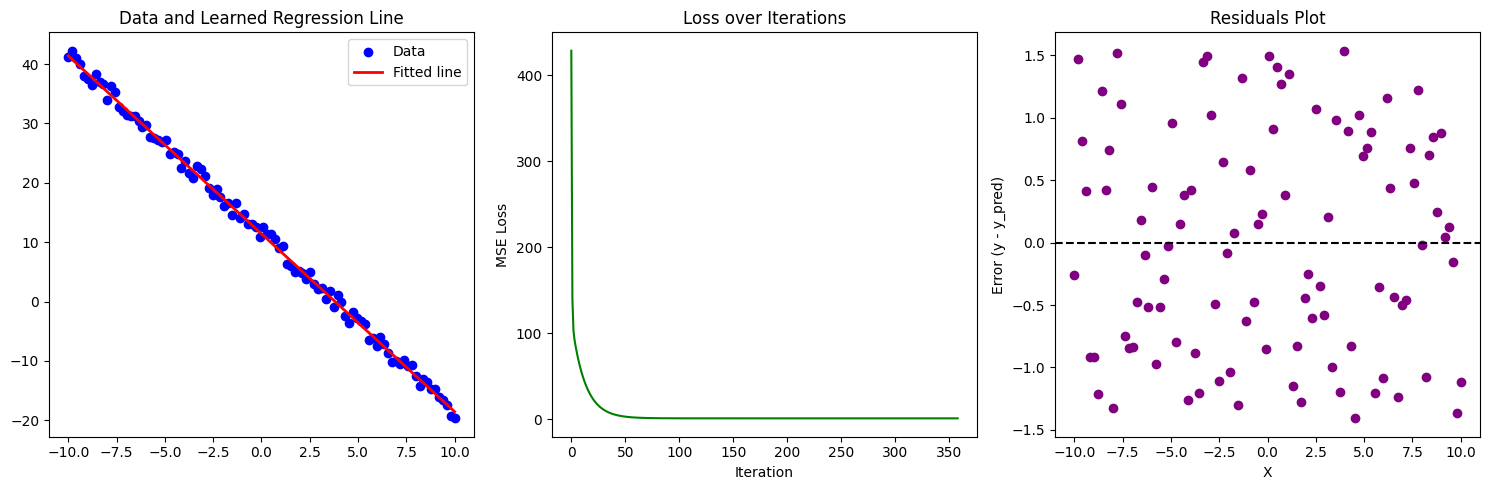

In [118]:
plot_res(X,y,losses,y_pred)

## now test it on the degree two line

In [119]:
y_2 = 2*X**2 - 4 + noise

model_2 = LinRegBasic(alpha=0.01, limit=200)
losses_2 = model_2.fit(X, y_2)

print(f"Learned w = {model_2.w:.3f}, b = {model_2.b:.3f}")

y_pred_2 = model_2.predict(X)

Learned w = 0.003, b = 65.406


In [120]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X.reshape(-1,1), y_2)
print("sklearn w:", lin.coef_[0], "b:", lin.intercept_)

sklearn w: 0.0030738480367364755 b: 65.42401024360264


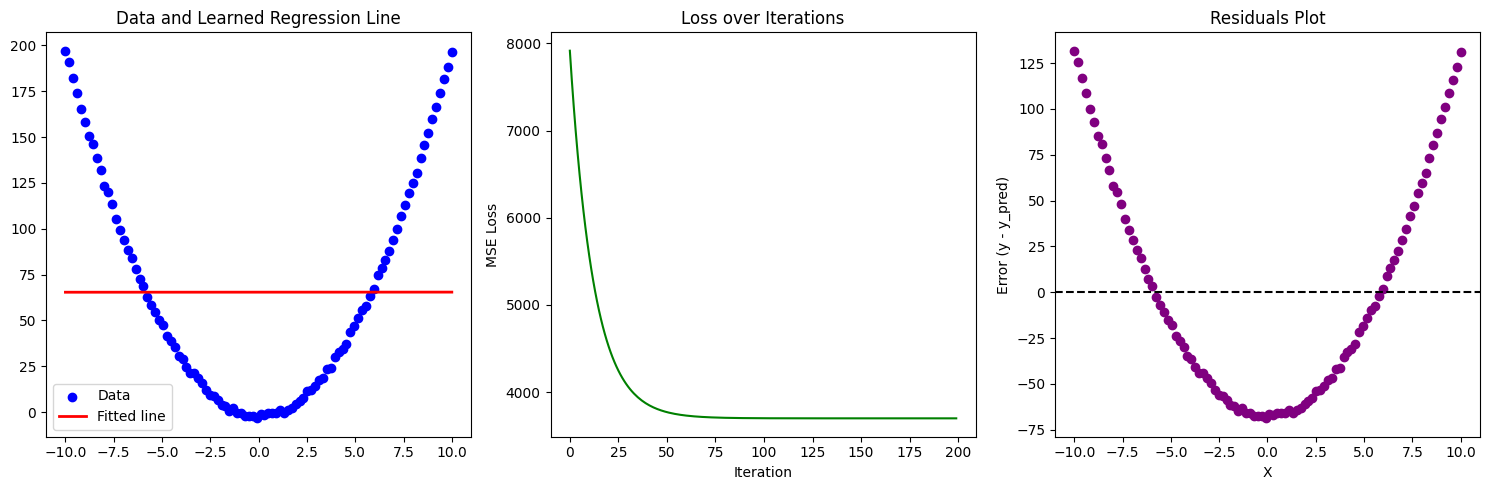

In [121]:
plot_res(X,y_2,losses_2,y_pred_2)

In [129]:
X_multi_2 = X**2

model_4 = LinRegBasic(alpha=1e-5, limit=20)
losses_4 = model_4.fit(X_multi_2, y)

print(f"Learned w = {model_4.w}, b = {model_4.b:.3f}")

y_pred_4 = model_4.predict(X_multi_2)

Learned w = 0.22893403137187734, b = 0.163


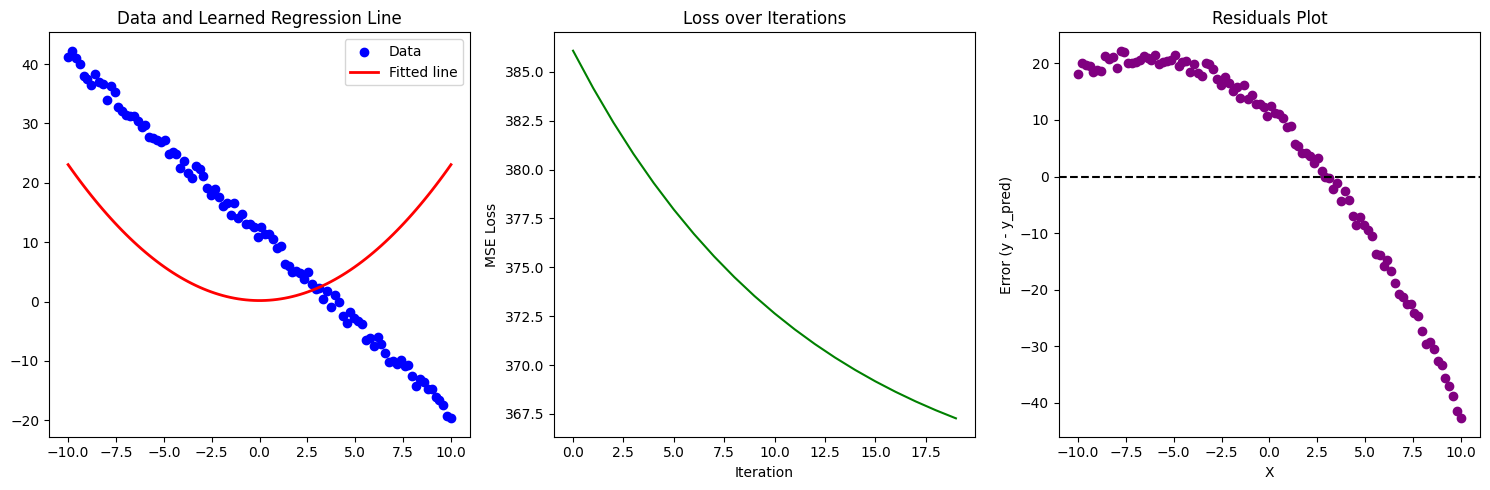

In [131]:
plot_res(X,y,losses_4,y_pred_4)

# Linear reg with multiple features
### 1. Represent weights as a **vector**

  $$
  \hat{y} = X \cdot w + b
  $$

  where `X` is `(n_samples, n_features)`.

---

### 2. Predictions use **matrix multiplication**

* With multiple features:
  `y_hat = X.dot(self.w) + b`

---

### 3. Compute gradients with vectors

* Gradient w\.r.t. weights:

  $$
  \frac{\partial L}{\partial w} = \frac{2}{n} X^T ( \hat{y} - y )
  $$

  which gives a vector of size `(n_features,)`.

* Gradient w\.r.t. bias:

  $$
  \frac{\partial L}{\partial b} = \frac{2}{n} \sum (\hat{y} - y)
  $$


### 4. Predictions

* For new `X` with multiple features, do `X.dot(w) + b`.

In [122]:
class LinReg(LinRegBasic):
    def __init__(self,alpha=0.01, limit=1000, epsilon=1e-6):
        super().__init__(alpha, limit, epsilon)

    def fit(self, X_train, y_train):

        X_train = np.array(X_train)
        y_train = np.array(y_train)
        self.w = np.zeros(X_train.shape[1])

        losses = []

        for iteration in range(self.limit):
            y_hats = X_train.dot(self.w) + self.b
            loss = np.mean((y_hats - y_train) ** 2)
            losses.append(loss)

            gradient_w = 2/len(X_train) * X_train.T.dot(y_hats - y_train)
            gradient_b = 2/len(X_train) * np.sum(y_hats - y_train)


            self.w -= self.alpha * gradient_w
            self.b -= self.alpha * gradient_b

            if np.linalg.norm(gradient_w)*self.alpha < self.epsilon and abs(gradient_b*100*self.alpha) < self.epsilon:
                break

        return losses


    def predict(self, X):
        return X.dot(self.w) + self.b


In [123]:
X_multi = np.column_stack((X, X**2))

model_3 = LinReg(alpha=1e-4, limit=200)
losses_3 = model_3.fit(X_multi, y_2)

print(f"Learned w = {model_3.w}, b = {model_3.b:.3f}")

y_pred_3 = model_3.predict(X_multi)

Learned w = [0.00228878 1.95368814], b = 0.231


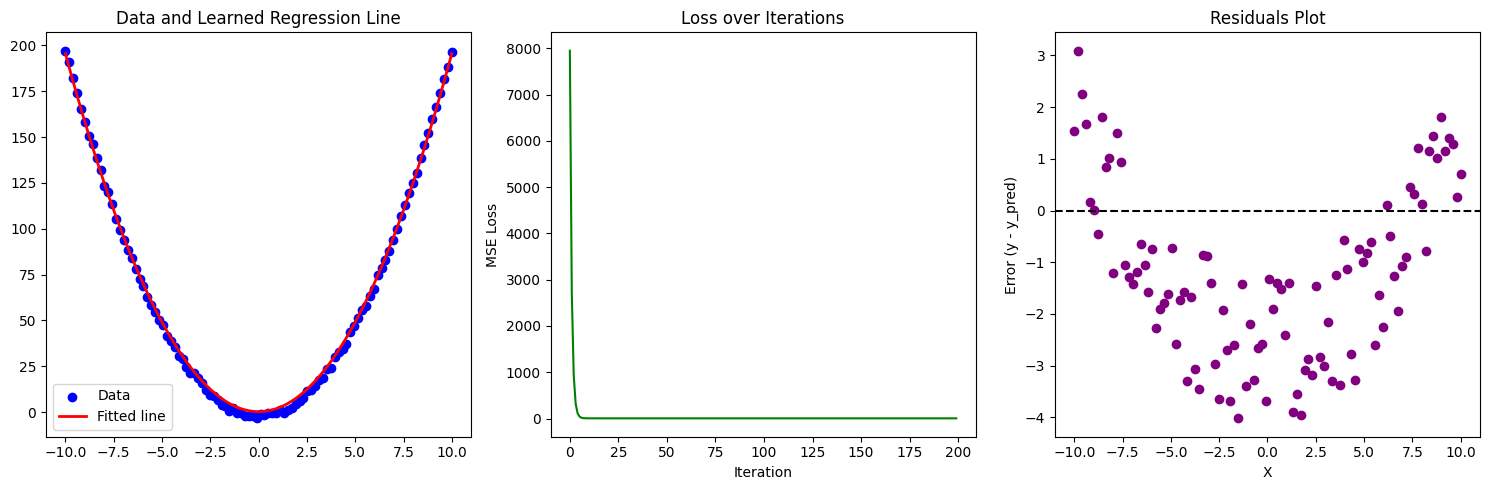

In [124]:
plot_res(X,y_2,losses_3,y_pred_3)

# Real testing

In [76]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

X_real, y_real = load_diabetes(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

model_gd = LinReg(alpha=0.05, limit=5000)
losses = model_gd.fit(X_scaled, y_real)
y_pred_gd = model_gd.predict(X_scaled)

model_sk = LinearRegression()
model_sk.fit(X_scaled, y_real)
y_pred_sk = model_sk.predict(X_scaled)


w_gd = model_gd.w
b_gd = model_gd.b
w_sk = model_sk.coef_
b_sk = model_sk.intercept_

print("linreg Weights:", w_gd.round(3), "Bias:", round(b_gd, 3))
print("Sklearn Weights:", w_sk.round(3), "Bias:", round(b_sk, 3))

linreg Weights: [ -0.474 -11.404  24.732  15.427 -37.179  22.278   4.582   8.358  35.548
   3.219] Bias: 152.133
Sklearn Weights: [ -0.476 -11.407  24.727  15.429 -37.68   22.676   4.806   8.422  35.734
   3.217] Bias: 152.133


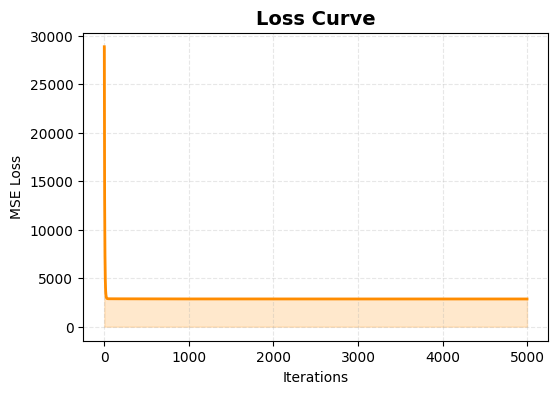

In [78]:
plt.figure(figsize=(6,4))
plt.plot(losses, color="darkorange", lw=2)
plt.fill_between(range(len(losses)), losses, alpha=0.2, color="darkorange")
plt.title("Loss Curve", fontsize=14, weight="bold")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.grid(alpha=0.3, linestyle="--")
plt.show()


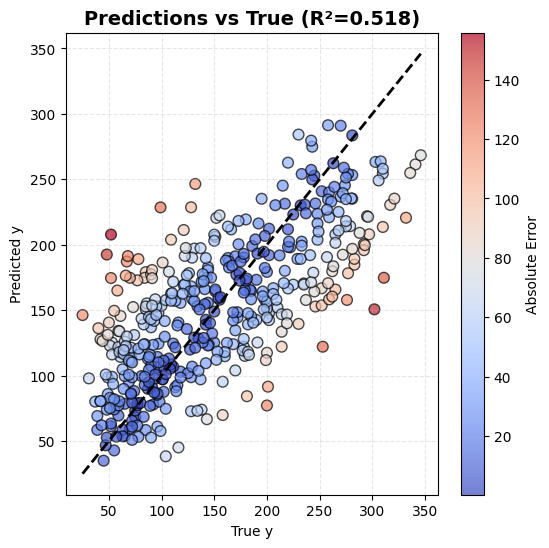

In [79]:
from sklearn.metrics import r2_score

errors = np.abs(y_real - y_pred_gd)
plt.figure(figsize=(6,6))
plt.scatter(y_real, y_pred_gd, c=errors, cmap="coolwarm", alpha=0.7, s=60, edgecolors="k")
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], "k--", lw=2)
plt.title(f"Predictions vs True (R²={r2_score(y_real, y_pred_gd):.3f})", fontsize=14, weight="bold")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.colorbar(label="Absolute Error")
plt.grid(alpha=0.3, linestyle="--")
plt.show()

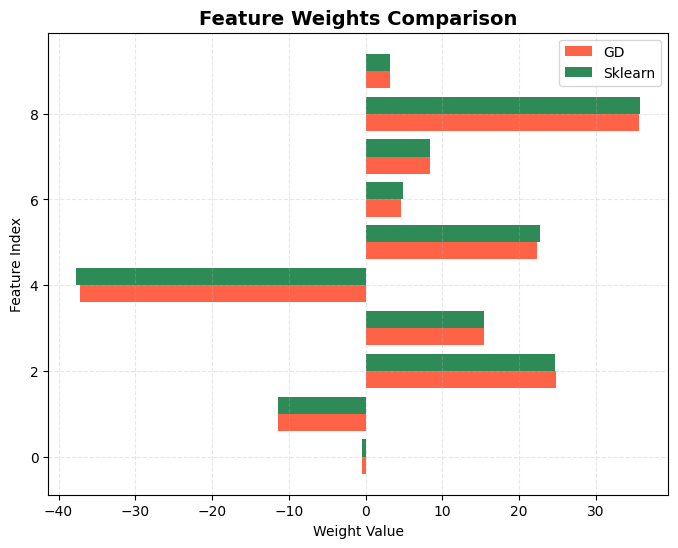

In [80]:
indices = np.arange(len(w_sk))
plt.figure(figsize=(8,6))
plt.barh(indices - 0.2, w_gd, height=0.4, label="GD", color="tomato")
plt.barh(indices + 0.2, w_sk, height=0.4, label="Sklearn", color="seagreen")
plt.title("Feature Weights Comparison", fontsize=14, weight="bold")
plt.xlabel("Weight Value")
plt.ylabel("Feature Index")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.show()